In [56]:
 # K-Neighbour

In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

In [58]:
# 0 means slow
# 1 means fast

In [2]:
df = pd.read_csv("terrain.csv")

In [3]:
df.head()

,bumpiness,grade,target
0,0.639427,0.099355,0.0
1,0.025011,0.685680,0.0
2,0.275029,0.544466,0.0
3,0.223211,0.977843,1.0
4,0.736471,0.358674,1.0


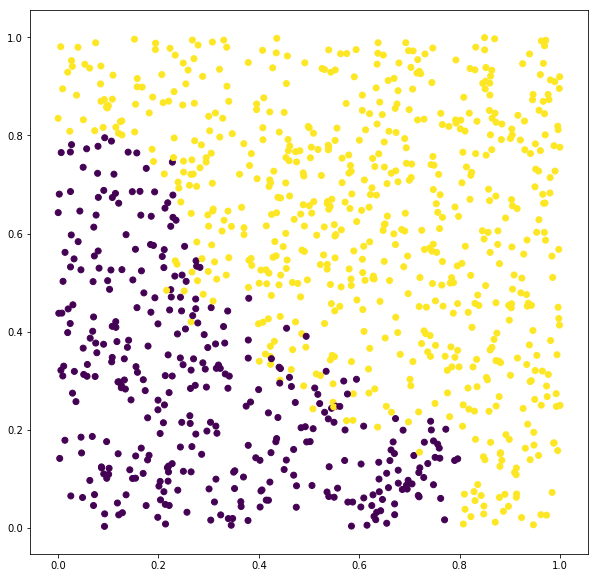

In [61]:
plt.figure(figsize=(10,10))
plt.scatter(df["bumpiness"],df["grade"],c=df["target"])
plt.show()

In [4]:
X = df[["bumpiness","grade"]].values
y = df["target"]

In [6]:
from sklearn.neighbors import KNeighborsClassifier

#For regression models, it calculates la media de los puntos:
#from sklearn.neighbors import KNeighborsRegressor

clf = KNeighborsClassifier(n_neighbors=1)

In [7]:
clf.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [8]:
clf.predict([[0.4,0.6]])

array([1.])

In [66]:
# We can make a 2d representation
# For this we create a mesh and we predict for each point in the mesh

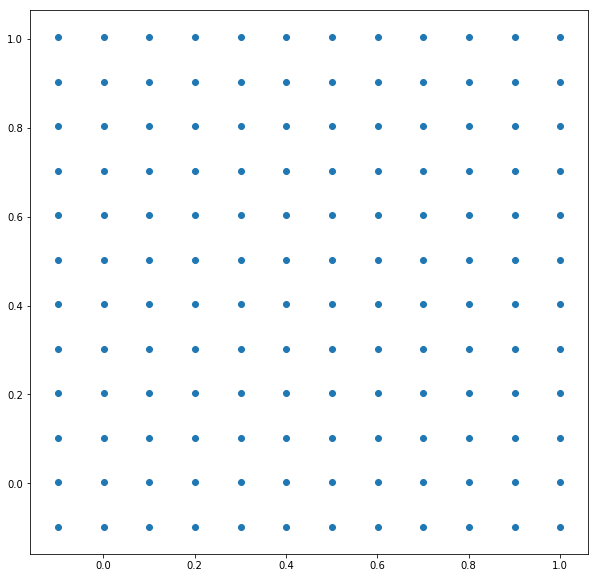

In [9]:
h = .1
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

plt.figure(figsize=(10,10))
plt.scatter(xx, yy)
plt.show()

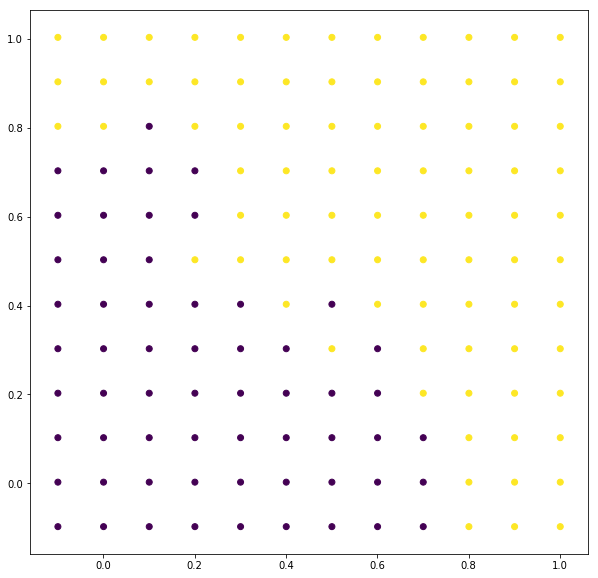

In [68]:
h = .1
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,10))
plt.scatter(xx, yy,c=Z)
plt.show()

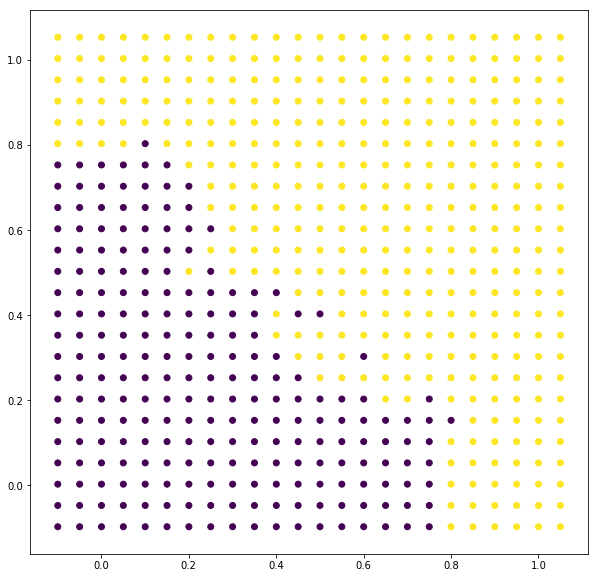

In [69]:
h = .05
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,10))
plt.scatter(xx, yy,c=Z)
plt.show()

In [70]:
# And now we reduce the size of the grid for higher resolution

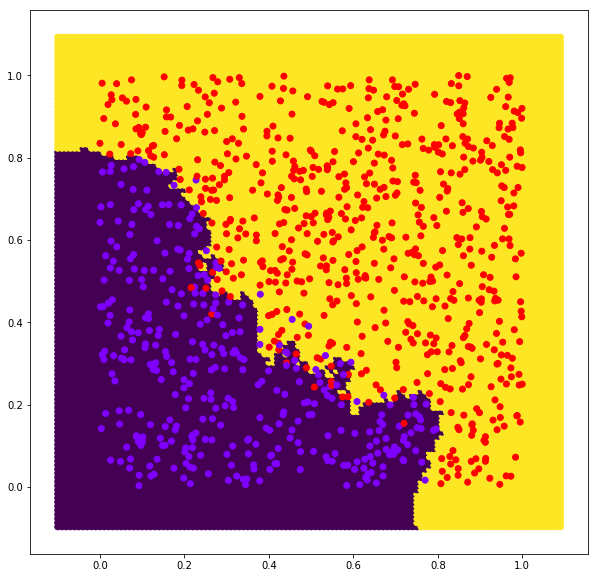

In [90]:
h = .01
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,10))
plt.scatter(xx, yy,c=Z)
plt.scatter(X[:,0],X[:,1],c=y,cmap="rainbow")
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=1)

In [13]:
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [14]:
from sklearn.metrics import accuracy_score

In [15]:
accuracy_score(y_test,clf.predict(X_test))

0.94

In [16]:
from sklearn.model_selection import cross_val_score

In [17]:
cross_val_score(clf,X,y,cv=5)

array([0.93034826, 0.92537313, 0.925     , 0.94472362, 0.93467337])

In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
mat = confusion_matrix(y_test,clf.predict(X_test))
dfmat = pd.DataFrame(mat,index = ["Slow","Fast"],
                  columns = ["Slow","Fast"])

Text(0.5, 15.0, 'Predicted label')

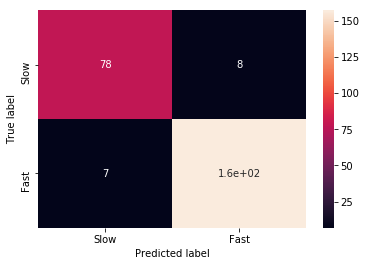

In [20]:
sns.heatmap(dfmat,annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score
print(["Slow","Fast"])
print(precision_score(y_test,clf.predict(X_test),average=None))
print(recall_score(y_test,clf.predict(X_test),average=None))
print(f1_score(y_test,clf.predict(X_test),average=None))

['Slow', 'Fast']
[0.91764706 0.95151515]
[0.90697674 0.95731707]
[0.9122807  0.95440729]


In [22]:
# Accuracy Score according to the number of neighbors
scores=[]
for i in range(1,40):
    clf = KNeighborsClassifier(n_neighbors=i)
    scores.append(cross_val_score(clf,X,y,cv=3))

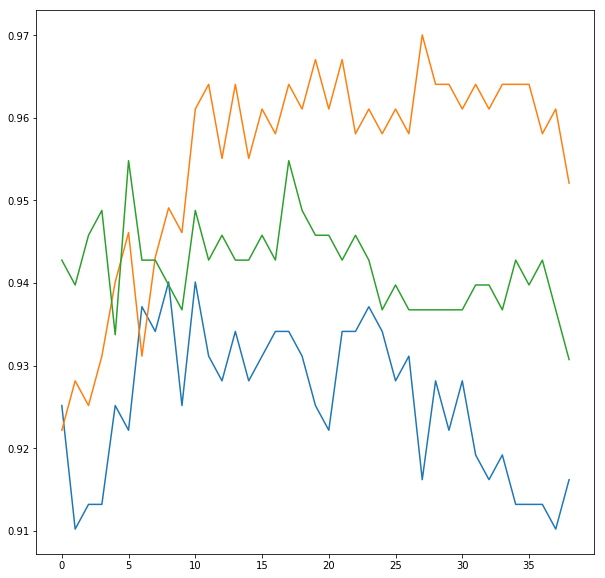

In [23]:
plt.figure(figsize=(10,10))
plt.plot(scores)
plt.show()
# El naranja va mejor con K mas alto, pero los tres van bien alrededor de k=10

In [89]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')